In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense


In [76]:
data = pd.read_csv('data.csv', parse_dates=['Month'])
data['Month'] = pd.to_datetime(data['Month'])
data


,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0
...,...,...
2815,1983-08-01,71.8
2816,1983-09-01,50.3
2817,1983-10-01,55.8
2818,1983-11-01,33.3


In [77]:

scaler = MinMaxScaler()

# Fit and transform the 'Sunspots' column
y = scaler.fit_transform(data[['Sunspots']])
X = scaler.fit_transform(data[['Month']])


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
# Crear el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/100
57/57 - 1s - 15ms/step - accuracy: 0.0277 - loss: 0.0339 - val_accuracy: 0.0133 - val_loss: 0.0263
Epoch 2/100
57/57 - 0s - 2ms/step - accuracy: 0.0277 - loss: 0.0299 - val_accuracy: 0.0133 - val_loss: 0.0253
Epoch 3/100
57/57 - 0s - 2ms/step - accuracy: 0.0277 - loss: 0.0295 - val_accuracy: 0.0133 - val_loss: 0.0257
Epoch 4/100
57/57 - 0s - 2ms/step - accuracy: 0.0277 - loss: 0.0297 - val_accuracy: 0.0133 - val_loss: 0.0252
Epoch 5/100
57/57 - 0s - 2ms/step - accuracy: 0.0277 - loss: 0.0295 - val_accuracy: 0.0133 - val_loss: 0.0252
Epoch 6/100
57/57 - 0s - 2ms/step - accuracy: 0.0277 - loss: 0.0296 - val_accuracy: 0.0133 - val_loss: 0.0248
Epoch 7/100
57/57 - 0s - 2ms/step - accuracy: 0.0277 - loss: 0.0296 - val_accuracy: 0.0133 - val_loss: 0.0265
Epoch 8/100
57/57 - 0s - 2ms/step - accuracy: 0.0277 - loss: 0.0294 - val_accuracy: 0.0133 - val_loss: 0.0246
Epoch 9/100
57/57 - 0s - 2ms/step - accuracy: 0.0277 - loss: 0.0293 - val_accuracy: 0.0133 - val_loss: 0.0260
Epoch 10/

In [64]:
# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


Train Loss: [0.024516014382243156, 0.024822695180773735]
Test Loss: [0.026405123993754387, 0.019503546878695488]


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


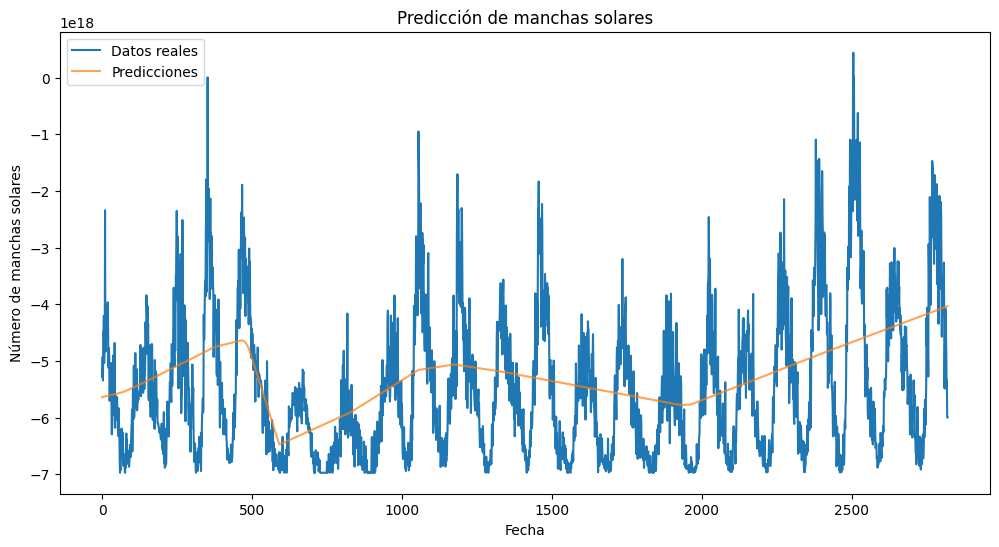

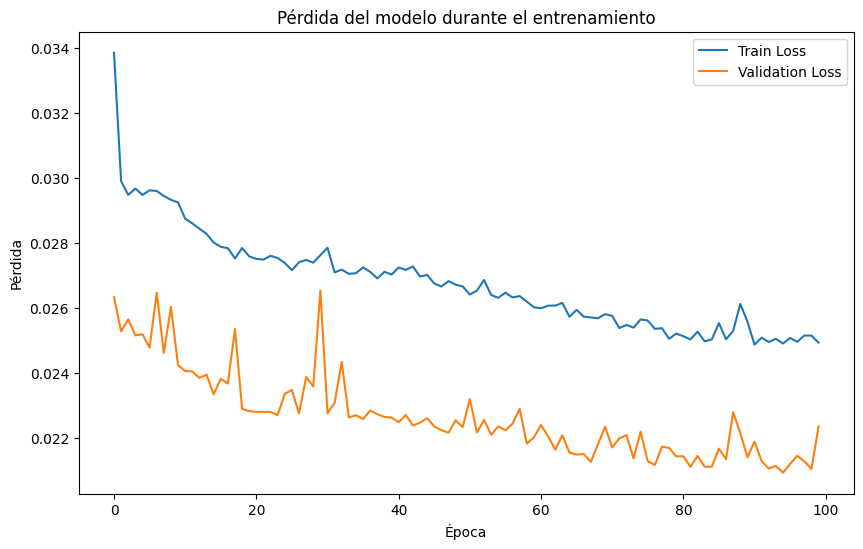

In [66]:
# Hacer predicciones
y_pred = model.predict(X)

# Desnormalizar las predicciones
y_pred = scaler.inverse_transform(y_pred)
y_true = scaler.inverse_transform(y)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(data.index, y_true, label='Datos reales')
plt.plot(data.index, y_pred, label='Predicciones', alpha=0.7)
plt.title('Predicción de manchas solares')
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.legend()
plt.show()

# Graficar la pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida del modelo durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


In [144]:
# Preparar los datos para la RNN
def create_sequences(data, seq_length):
    X_ = []
    y_ = []
    for i in range(len(data) - seq_length):
        X_.append(data[i:(i + seq_length), 0])
        y_.append(data[i + seq_length, 0])
    return np.array(X_), np.array(y_)

seq_length = 12  # Usaremos los últimos 12 meses para predecir el siguiente
X_N, y_N = create_sequences(y, seq_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_N, y_N, test_size=0.2, random_state=42)

# Reshape de los datos para que se ajusten al formato de entrada de LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



In [79]:
# Crear el modelo RNN
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)



Epoch 1/100


C:\Users\rentt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 - 3s - 49ms/step - accuracy: 0.0256 - loss: 0.0196 - val_accuracy: 0.0222 - val_loss: 0.0065
Epoch 2/100
57/57 - 0s - 7ms/step - accuracy: 0.0262 - loss: 0.0068 - val_accuracy: 0.0222 - val_loss: 0.0060
Epoch 3/100
57/57 - 0s - 7ms/step - accuracy: 0.0262 - loss: 0.0063 - val_accuracy: 0.0222 - val_loss: 0.0054
Epoch 4/100
57/57 - 0s - 7ms/step - accuracy: 0.0262 - loss: 0.0060 - val_accuracy: 0.0222 - val_loss: 0.0051
Epoch 5/100
57/57 - 0s - 6ms/step - accuracy: 0.0262 - loss: 0.0056 - val_accuracy: 0.0222 - val_loss: 0.0056
Epoch 6/100
57/57 - 0s - 6ms/step - accuracy: 0.0262 - loss: 0.0054 - val_accuracy: 0.0222 - val_loss: 0.0045
Epoch 7/100
57/57 - 0s - 7ms/step - accuracy: 0.0262 - loss: 0.0053 - val_accuracy: 0.0222 - val_loss: 0.0044
Epoch 8/100
57/57 - 0s - 7ms/step - accuracy: 0.0262 - loss: 0.0052 - val_accuracy: 0.0222 - val_loss: 0.0044
Epoch 9/100
57/57 - 1s - 9ms/step - accuracy: 0.0262 - loss: 0.0052 - val_accuracy: 0.0222 - val_loss: 0.0042
Epoch 10/100
57/57 - 

In [80]:
# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


Train Loss: [0.0037620060611516237, 0.025378450751304626]
Test Loss: [0.003509359899908304, 0.01957295462489128]


In [146]:
len(y_N)

2808

In [147]:
# Modificar la función de predicción
def predict(model, data, seq_length):
    predictions = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        seq = seq.reshape((1, seq_length, 1))
        pred = model.predict(seq, verbose=0)[0]
        predictions.append(pred)
    return np.array(predictions)

# Hacer predicciones
predictions = predict(model, y, seq_length)

# Desnormalizar las predicciones
predictions = scaler.inverse_transform(predictions)


In [140]:
predictions  =predictions.tolist()

predictions = [pred[0] for pred in predictions]

In [141]:
predictions

[-6.887540947505119e+18,
 -6.885809766447186e+18,
 -6.88404999808693e+18,
 -6.882350153110389e+18,
 -6.880607427180364e+18,
 -6.87886635051778e+18,
 -6.877099985087758e+18,
 -6.875325373320528e+18,
 -6.873528771320742e+18,
 -6.871709079576773e+18,
 -6.869896534658384e+18,
 -6.868071345356276e+18,
 -6.866265947263468e+18,
 -6.864443506740429e+18,
 -6.862613369635996e+18,
 -6.860844255426904e+18,
 -6.859046004159676e+18,
 -6.857253800206402e+18,
 -6.855434658218246e+18,
 -6.853610018671952e+18,
 -6.851735351346594e+18,
 -6.849822750870077e+18,
 -6.847909050881933e+18,
 -6.845966213835653e+18,
 -6.84400743387077e+18,
 -6.842022265626821e+18,
 -6.840003562278224e+18,
 -6.838021692569158e+18,
 -6.836009036534514e+18,
 -6.8339936317208e+18,
 -6.831956786430345e+18,
 -6.829924339186401e+18,
 -6.827863304640135e+18,
 -6.825772033524105e+18,
 -6.823682961431331e+18,
 -6.821575197640884e+18,
 -6.819488324571365e+18,
 -6.817387707606499e+18,
 -6.815275545769542e+18,
 -6.813236501455831e+18,
 -6.8

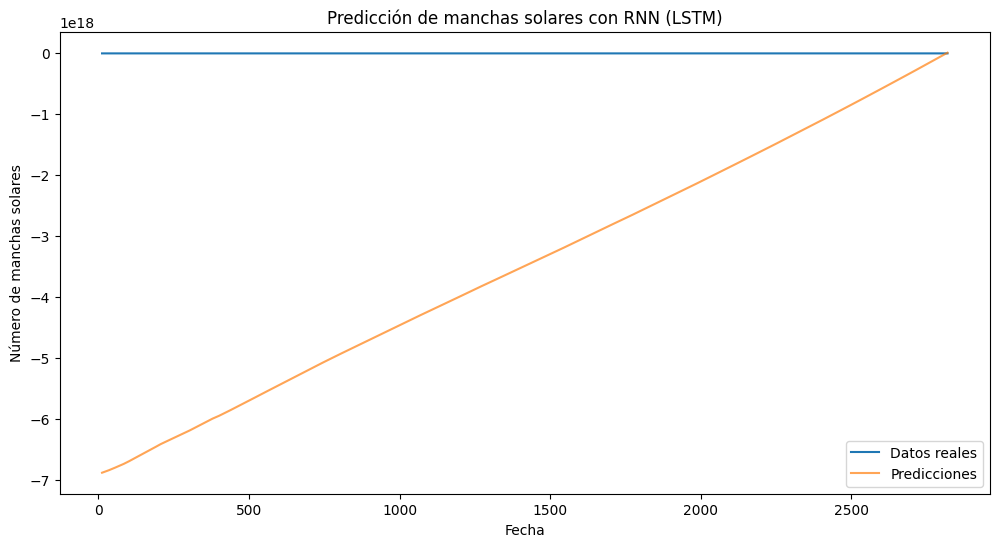

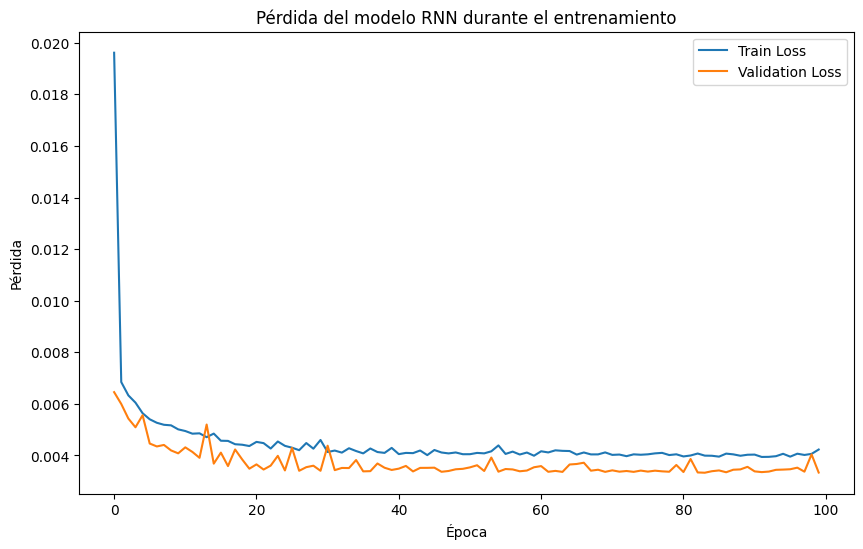

In [142]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[seq_length:], data['Sunspots'].values[seq_length:], label='Datos reales')
plt.plot(data.index[seq_length:], predictions, label='Predicciones', alpha=0.7)
plt.title('Predicción de manchas solares con RNN (LSTM)')
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.legend()
plt.show()

# Graficar la pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida del modelo RNN durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

